# Онтологии в музыкальном домене: 10 заданий на Python с OWLready2, RDFLib, SPARQL

**Онтология (ontology)** - формальное описание предметной области, включающее классы, свойства, отношения и индивиды.

Назначение онтологии: моделирует знания — позволяет описывать объекты (например, песни и исполнителей) и связи между ними.
Пример создания онтологии:

```
onto = get_ontology("http://example.org/music_ontology.owl")
```
Обратите внимание! Когда вы делаете get_ontology("http://example.org/music_ontology.owl"), Owlready2 сопоставляет эту же IRI с уже загруженным объектом в своей «среде» (default_world). Удаление файлов на диске не очищает объекты, которые уже находятся в памяти: классы, свойства и индивидуумы, связанные с этой IRI, всё ещё живы в default_world. Поэтому при повторном get_ontology вы получаете тот же самый объект, а не создаёте новый «с нуля».

**IRI (Internationalized Resource Identifier)** — это расширение понятия URI (Uniform Resource Identifier), позволяющее использовать в идентификаторах не‑ASCII символы (кириллицу, иероглифы и прочие). В контексте RDF/OWL‑онтологий IRI выполняет роль глобального уникального имени для всех сущностей:
- Ресурсов (классов, свойств, индивидуумов)
- Онтологий (файлов или пространств имён)
- Литералов и датatypes
Основные характеристики IRI:
- Универсальность: одно и то же IRI в любой точке мира будет ссылкой на один и тот же ресурс.
- Международность: допускается использование символов различных письменностей, например:
```
http://пример.рф/онтология#Песня
```
Структура: похожа на URL, но допускает широкий набор символов за счёт кодирования в UTF‑8.

Зачем нужны IRI в онтологиях? 
- Уникальность - позволяют однозначно отличать классы и свойства разных онтологий.
- Связь с веб‑ресурсами - часто IRI совпадают с URL, по которому можно получить описание онтологии или документацию.
- Интеграция и объединение - разные онтологии могут ссылаться друг на друга через IRI, объединяя знания.

Чтобы получить действительно чистую онтологию, можно воспользоваться следующими механизмами:

1. Создать свой собственный World
```
from owlready2 import World

# каждый World хранит свои собственные онтологии в памяти
world = World()
onto = world.get_ontology("http://example.org/music_ontology.owl")
# … работаем с onto …
```
При следующем запуске вы можете создать новый World, и он не будет хранить старые объекты.

2. Удалить старую онтологию из default_world
```
from owlready2 import default_world

# получить ссылку на старую онтологию
old_onto = default_world.get_ontology("http://example.org/music_ontology.owl")

# удалить её из памяти
if old_onto in default_world.ontologies.values():
    default_world.ontologies.pop(old_onto.base_iri)

# теперь get_ontology создаст свежий объект
onto = default_world.get_ontology("http://example.org/music_ontology.owl")
```
3. Использовать уникальные IRI (например, с датой/uuid)
Если вы каждый раз даёте новой онтологии уникальный IRI, она никогда не пересечётся с уже загруженной.

```
import uuid
iri = f"http://example.org/music_{uuid.uuid4()}.owl"
onto = get_ontology(iri)
```
**Класс (Class)** - абстрактное понятие, объединяющее объекты с общими свойствами. Класс используется для описания типов объектов (экземпляров).

Пример создания класса:
```
class Genre(Thing): pass
class Artist(Thing): pass
class Song(Thing): pass
```
Виды:
- Thing — базовый класс во всех OWL-онтологиях.
- Пользовательские: Genre, Artist, Song — классы, описывающие жанры, исполнителей и песни.

**Свойство (Property)** - описание отношения между объектами. Свойство устанавливает связи между экземплярами разных классов.
Пример создания свойства:
```
class performs(Artist >> Song): pass
class has_genre(Song >> Genre): pass
```
Виды:
- Object Property (отношение между объектами) — как в коде, так называемое объектное свойство.
- Data Property (отношение с данными, например, строка, число) — не используется в этом примере. Data Property в owlready2 - свойство, связывающее индивида с конкретным значением (строкой, числом, датой и т.д.).

**Индивидуум / экземпляр (Individual / Instance)** - конкретный объект предметной области, принадлежащий определённому классу. Индивидуум представляет реальные сущности (конкретные песни, исполнителей, жанры).

Пример создания индивидуума:
```
rock = Genre("rock")
pop = Genre("pop")

queen = Artist("queen")
taylorswift = Artist("taylorswift")

song1 = Song("bohemian_rhapsody")
song2 = Song("shake_it_off")
```
**Отношения между экземплярами** - связывает объекты с другими объектами по определённым правилам (через свойства).

Пример создания отношения:
```
queen.performs.append(song1)
taylorswift.performs.append(song2)

song1.has_genre.append(rock)
song2.has_genre.append(pop)

```

In [1]:
# Установка необходимых библиотек
!pip install owlready2 rdflib SPARQLWrapper


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


# 📘 Создание базовой онтологии

1. Создаём классы: Artist, Song, Genre.
2. Добавляем несколько индивидуумов и сохраняем онтологию в формате OWL.


In [33]:
from owlready2 import *

onto = get_ontology("http://example.org/music_ontology.owl")

with onto:
    class Genre(Thing): pass
    class Artist(Thing): pass
    class Song(Thing): pass

    class performs(Artist >> Song): pass
    class has_genre(Song >> Genre): pass

    rock = Genre("rock")
    pop = Genre("pop")

    queen = Artist("queen")
    taylorswift = Artist("taylorswift")

    song1 = Song("bohemian_rhapsody")
    song2 = Song("shake_it_off")

    queen.performs.append(song1)
    taylorswift.performs.append(song2)

    song1.has_genre.append(rock)
    song2.has_genre.append(pop)

onto.save(file="music_ontology.owl", format="rdfxml")# сохраняем онтологию -сериализация онтологии в файл, формат rdfxml — один из стандартов представления RDF/OWL.

# 📘 Загрузка онтологии и просмотр триплетов

Загружаем OWL-файл и выводим связи для каждого индивидуума.


In [35]:
onload = get_ontology("music_ontology.owl").load()

for ind in onload.individuals():
    print(f"{ind.name} ({ind.__class__.__name__})")
    for prop in ind.get_properties():
        for val in prop[ind]:
            if val is not None:  # Проверяем, что значение не None
                print(f"  {prop.name} -> {val.name}")
            else:
                print(f"  {prop.name} -> None")


rock (Genre)
pop (Genre)
queen (Artist)
  performs -> bohemian_rhapsody
  performs -> bohemian_rhapsody
  performs -> bohemian_rhapsody
taylorswift (Artist)
  performs -> shake_it_off
  performs -> shake_it_off
  performs -> shake_it_off
bohemian_rhapsody (Song)
  has_genre -> rock
  has_genre -> rock
  has_genre -> rock
shake_it_off (Song)
  has_genre -> pop
  has_genre -> pop
  has_genre -> pop
edsheeran (Artist)
  performs -> perfect
  performs -> perfect
perfect (Song)
  has_genre -> ballad
  has_genre -> ballad
ballad (Genre)
metallica (Artist)
  performs -> nothing_else_matters
  performs -> nothing_else_matters
  performs -> nothing_else_matters
  performs -> nothing_else_matters
nothing_else_matters (Song)
  has_genre -> rock
  has_genre -> rock
  has_genre -> rock
  has_genre -> rock
avicii (Artist)
  performs -> wake_me_up
  performs -> wake_me_up
  performs -> wake_me_up
  performs -> wake_me_up
wake_me_up (Song)
  has_genre -> None
  has_genre -> electronic
  has_genre -> e

Мы видим при выводе повторы: проблема в том, что при выводе данных для каждого индивида происходит повторный вывод одних и тех же связей. Это может происходить из-за того, что связь между индивидом и его свойствами устанавливается несколько раз или же несколько значений для свойства. Чтобы избежать повторений, можно использовать структуру данных, которая гарантирует уникальность значений, например, set, для хранения уже выведенных данных.

In [37]:
# Просмотр триплетов без повторений
"""
Загружаем OWL-файл и выводим связи для каждого индивидуума, предотвращая вывод повторений.
"""
onload = get_ontology("music_ontology.owl").load()

# Множество для отслеживания уже выведенных связей
seen_triples = set()

for ind in onload.individuals():
    print(f"{ind.name} ({ind.__class__.__name__})")
    for prop in ind.get_properties():
        for val in prop[ind]:
            if val is not None:  # Проверяем, что значение не None
                 # Формируем уникальный идентификатор для каждого триплета
                 triple = (prop.name, val.name)
                 if triple not in seen_triples:
                     print(f"  {prop.name} -> {val.name}")
                     seen_triples.add(triple)  # Добавляем триплет в множество
            else:
                print(f"  {prop.name} -> None")
           


rock (Genre)
pop (Genre)
queen (Artist)
  performs -> bohemian_rhapsody
taylorswift (Artist)
  performs -> shake_it_off
bohemian_rhapsody (Song)
  has_genre -> rock
shake_it_off (Song)
  has_genre -> pop
edsheeran (Artist)
  performs -> perfect
perfect (Song)
  has_genre -> ballad
ballad (Genre)
metallica (Artist)
  performs -> nothing_else_matters
nothing_else_matters (Song)
avicii (Artist)
  performs -> wake_me_up
wake_me_up (Song)
  has_genre -> None
  has_genre -> electronic
electronic (Genre)


#### Удаляем все элементы, равные None, из свойства has_genre для каждой песни

In [42]:

with onload:
    for song in onload.Song.instances():
        # Проходим по всем жанрам и удаляем None
        genres_to_remove = [genre for genre in song.has_genre if genre is None]
        for genre in genres_to_remove:
            song.has_genre.remove(genre)

# Выводим снова для проверки
for ind in onload.individuals():
    print(f"{ind.name} ({ind.__class__.__name__})")
    for prop in ind.get_properties():
        for val in prop[ind]:
            print(f"  {prop.name} -> {val.name}")


rock (Genre)
pop (Genre)
queen (Artist)
  performs -> bohemian_rhapsody
  performs -> bohemian_rhapsody
  performs -> bohemian_rhapsody
taylorswift (Artist)
  performs -> shake_it_off
  performs -> shake_it_off
  performs -> shake_it_off
bohemian_rhapsody (Song)
  has_genre -> rock
  has_genre -> rock
  has_genre -> rock
shake_it_off (Song)
  has_genre -> pop
  has_genre -> pop
  has_genre -> pop
edsheeran (Artist)
  performs -> perfect
  performs -> perfect
  performs -> perfect
perfect (Song)
  has_genre -> ballad
  has_genre -> ballad
  has_genre -> ballad
ballad (Genre)
metallica (Artist)
  performs -> nothing_else_matters
  performs -> nothing_else_matters
  performs -> nothing_else_matters
  performs -> nothing_else_matters
nothing_else_matters (Song)
  has_genre -> rock
  has_genre -> rock
  has_genre -> rock
  has_genre -> rock
avicii (Artist)
  performs -> wake_me_up
  performs -> wake_me_up
  performs -> wake_me_up
  performs -> wake_me_up
wake_me_up (Song)
  has_genre -> ele

# 📘 Добавление нового исполнителя и песни

Добавим нового исполнителя и сохраним онтологию заново.


In [43]:
with onload:
    edsheeran = onload.Artist("edsheeran")
    perfect = onload.Song("perfect")
    ballad = onload.Genre("ballad")
    edsheeran.performs.append(perfect)
    perfect.has_genre.append(ballad)

onload.save(file="music_ontology_updated.owl", format="rdfxml")

# 📘  Использование SPARQL через RDFLib

Преобразуем онтологию в граф и делаем SPARQL-запрос: найти всех исполнителей песен в жанре 'rock'.


In [44]:
from rdflib import Graph

g = Graph()
g.parse("music_ontology_updated.owl")

qres = g.query('''
PREFIX : <http://example.org/music_ontology.owl#>
SELECT ?artist WHERE {
  ?artist a :Artist .
  ?artist :performs ?song .
  ?song :has_genre :rock .
}''')

print("Rock Artists from SPARQL:")
for row in qres:
    print(row[0].split("#")[-1])

Rock Artists from SPARQL:
queen
metallica


# 📘  Визуализация онтологии с networkx

Построим простой граф (исполнитель → песня → жанр).


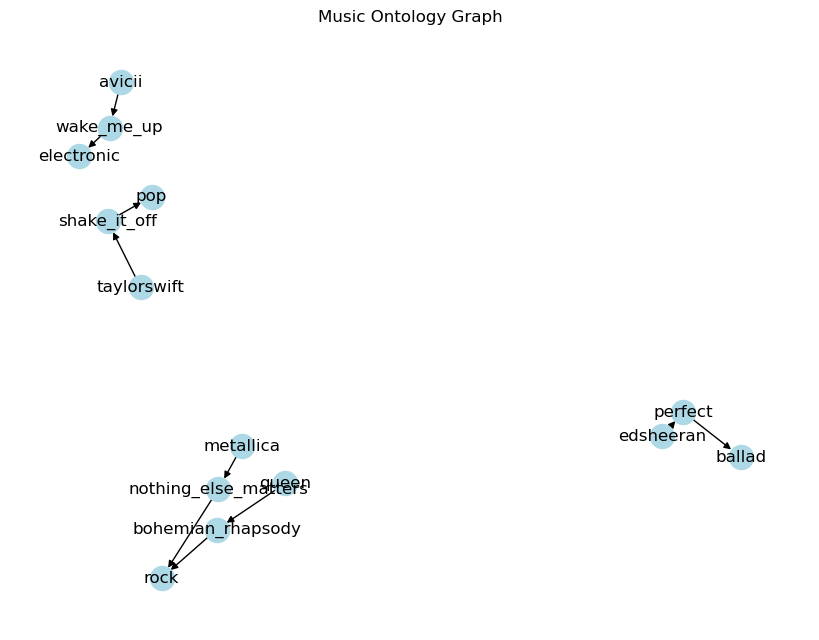

In [45]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

for artist in onload.Artist.instances():
    for song in artist.performs:
        G.add_edge(artist.name, song.name)
        for genre in song.has_genre:
            G.add_edge(song.name, genre.name)

plt.figure(figsize=(8,6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, arrows=True, node_color='lightblue')
plt.title("Music Ontology Graph")
plt.show()

# 📘 Добавление аксиомы (эквивалентность классов)

Если артист исполняет песню в жанре 'rock' → RockArtist


In [46]:
with onload:
    class RockArtist(onload.Artist):
        equivalent_to = [onload.Artist & onload.performs.some(onload.has_genre.value(onload.rock))]

# Псевдо-инференция без reasoner
rock_artists = set()
for artist in onload.Artist.instances():
    for song in artist.performs:
        if onload.rock in song.has_genre:
            rock_artists.add(artist.name)

print("\nRock Artists (inferred manually):")
print("\n".join(rock_artists))


Rock Artists (inferred manually):
metallica
queen


# 📘 Генерация онтологии из CSV

Загружаем CSV с артистами, песнями и жанрами и автоматически создаём онтологию.


In [56]:
import pandas as pd

# Обновленные данные
data = pd.DataFrame({
    "artist": ["metallica", "avicii", "queen", "taylorswift", "edsheeran", "beyoncé", "drake", "kanyewest"],
    "song": ["nothing_else_matters", "wake_me_up", "bohemian_rhapsody", "shake_it_off", "perfect", "halo", "god's_plan", "stronger"],
    "genre": ["rock", "electronic", "rock", "pop", "ballad", "pop", "hip_hop", "hip_hop"]
})

with onload:
    for _, row in data.iterrows():
        # Создаем исполнителя и песню
        a = onload.Artist(row.artist)
        s = onload.Song(row.song)

        # Проверяем, существует ли жанр в онтологии
        if not hasattr(onload, row.genre.replace(' ', '_').lower()):
            # Если жанр не существует, создаем новый жанр как класс
            genre_class_name = row.genre.replace(' ', '_').lower()
            g = type(genre_class_name, (onload.Genre,), {})  # Динамически создаем жанр
            setattr(onload, genre_class_name, g)  # Добавляем жанр в пространство имен

        else:
            # Если жанр существует, получаем его
            g = getattr(onload, row.genre.replace(' ', '_').lower())

        # Добавляем песню к исполнителю и жанр к песне
        a.performs.append(s)
        s.has_genre.append(g)


# 📘  Проверка подтипов и иерархий

Выводим всех подтипов Artist и их индивидуумов.


In [59]:
print("\nSubclasses of Artist:")
for sub in Artist.subclasses():
    print(f"{sub.name}:", [i.name for i in sub.instances()])


Subclasses of Artist:
RockArtist: []


In [62]:
 for sub in Artist.subclasses():
     print (sub)

music_ontology.RockArtist


In [58]:
print([a.name for a in Artist.instances()])


['queen', 'taylorswift', 'edsheeran', 'metallica', 'avicii', 'beyoncé', 'drake', 'kanyewest']


# 📘Сериализация в другие форматы (Turtle, N-Triples)

Сохраняем RDF в Turtle и N-Triples для последующего анализа.


In [54]:
rdf_graph = Graph()
rdf_graph.parse("music_ontology_updated.owl")
rdf_graph.serialize(destination="music.ttl", format="turtle")
rdf_graph.serialize(destination="music.nt", format="nt")

<Graph identifier=N8f68606e13ed4b3eb9b965e9a57cc3c4 (<class 'rdflib.graph.Graph'>)>

# 📘  Использование SPARQLWrapper для удалённого запроса

Если есть SPARQL endpoint, можно отправлять запросы из Python.
(пример с DBpedia)


In [55]:
from SPARQLWrapper import SPARQLWrapper, JSON

sparql = SPARQLWrapper("http://dbpedia.org/sparql")
sparql.setQuery("""
    SELECT ?artist WHERE {
      ?artist a dbo:MusicalArtist .
      ?artist dbo:genre dbr:Rock_music .
    } LIMIT 5
""")
sparql.setReturnFormat(JSON)
results = sparql.query().convert()

print("\nRock Artists from DBpedia:")
for res in results["results"]["bindings"]:
    print(res["artist"]["value"])


Rock Artists from DBpedia:
http://dbpedia.org/resource/Caleb_Johnson
http://dbpedia.org/resource/Calle_Kristiansson
http://dbpedia.org/resource/Calvin_%22Fuzzy%22_Samuel
http://dbpedia.org/resource/Camila_Moreno
http://dbpedia.org/resource/Cara_Luft
